# Introduction 

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups. This notebook will be broken down into three sections 

1. Exploring the dataset 
2. Testing normailty 
3. t tests and ANOVA


-------------------------------------------------------------------------------

# Part One:Exploring the data

In [1]:
# as always start with imports

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import zscore
from scipy.stats import anderson
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels import robust
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import normaltest
from scipy.stats import median_test
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd








In [2]:
df = pd.read_csv('PlantGrowth.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [4]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

In [5]:
df.isnull()

,rownames,weight,group
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


This dataset compares plant dried weight from a plant growth experiment subjected under ctrl, trt1, and trt2 conditions. It contains 30 instances in three columns, which are rownames, weight, and group.

Column rownames is a 64-bit integer type of whole numbers (without decimal points) with no missing values. These seem to be row labels only and will be omitted from the statistical analysis.

Column weight is a 64-bit floating-point numbers data type, which contains decimal points. Even if the column contains both integers and floats, the column will assign it as floats to retain the decimal values. Weight is a continuous numerical data, which is a type of quantitative data and can contain any number of measurements between two points. This column has no missing values. Pandas default to float if there are missing values in case they have decimals. In this dataset, weight contains the dried weight of plants in grams.



In [6]:
df.drop(columns=['rownames'], inplace=True)

# describe dataset
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


Plantgrowth.csv is a complete dataset. 'Count' shows that column weight contains 30 non-null (non-missing) values in 30 rows.

Mean or average value is calculated by totaling the sum of all values and dividing it by the count, which pinpoints the general central location within the dataset. However, outliers can distort the mean, thus misrepresenting the average of the data. The mean for weight is 5.073.

Std (standard deviation) measures the dispersion of the data around the mean. A low standard deviation indicates that the data is concentrated closely around the mean, and a high value indicates that the values are spread farther away from the mean. From the dataset, column weight is concentrated around the mean.

Min is the smallest value in the dataset, however, if the value is extremely low, it could be an outlier  The min for weight is 3.590.

Quartiles split sorted data into four equal parts which provide an insight into the middle point and spread of the data, whether it is symmetrical or skewed and the presence of outliers. If the lower quartile is farther from the median than the upper quartile, the distribution is negatively/left skewed with a longer left tail. A positively/right-skewed distribution with a longer right tail occurs when 25th percentile or first quartile describes the spread of the lower section of the dataset. For column weight, 25% of the data is below 4.55 while the higher 75% data is above 4.55. The distance between the lower quartile and the median (0.605) is higher than the distance between the upper quartile and the median (0.375), suggesting a negatively-skewed (left-skewed) distribution for column weight.

50th percentile/second quartile/median divides the sorted dataset into two equal portions. Half of the dataset in column weight is lower than 5.155.

75th percentile or third quartile describes the upper segment of the dataset. 75% of the data for column weight is below 5.53 while the rest (higher 25%) are above 5.53.

Finally, max is the biggest value in the data, which could be an outlier if the value is exceptionally high (Cowley, 2021). The max weight is 6.310.



In [7]:
df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


# Plotting the data

Histplot 

A histogram is a visual representation of the distribution of quantitative data. Histograms give a rough sense of the density of the underlying distribution of the data.

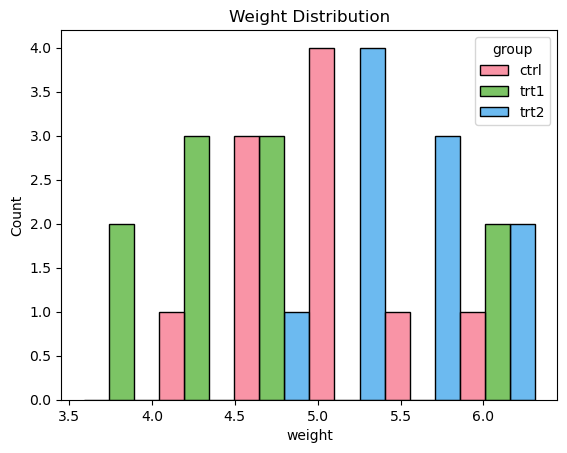

In [8]:
sns.histplot(data=df, x=df['weight'], hue='group', multiple="dodge", palette='husl').set_title('Weight Distribution')
plt.show()

Boxplots

Boxplots will give a visual representation of how the data is scattered over the plane. It shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

C:\Users\keith\AppData\Local\Temp\ipykernel_15048\426837720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='weight', data=df, palette='Set2')


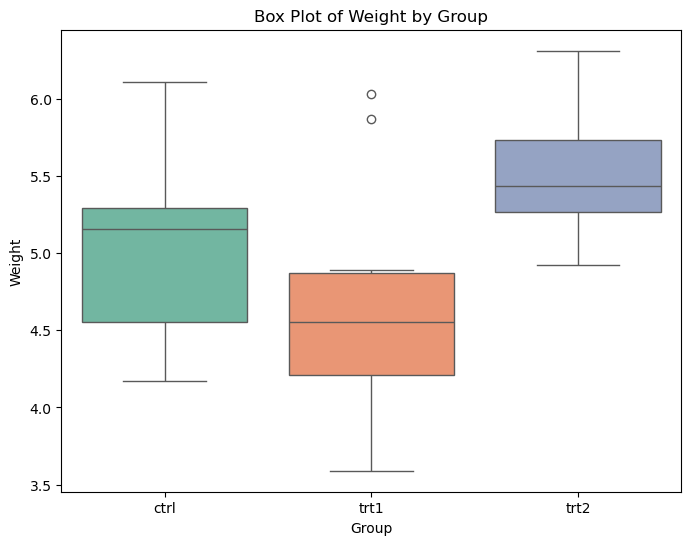

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df, palette='Set2')
plt.title("Box Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

Violin Plots

Violin plots are similar to histograms and box plots in that they demonstrate the probability distribution of the data. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample.

C:\Users\keith\AppData\Local\Temp\ipykernel_15048\2763271806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='group', y='weight', data=df, palette='Set2', inner="quartile")


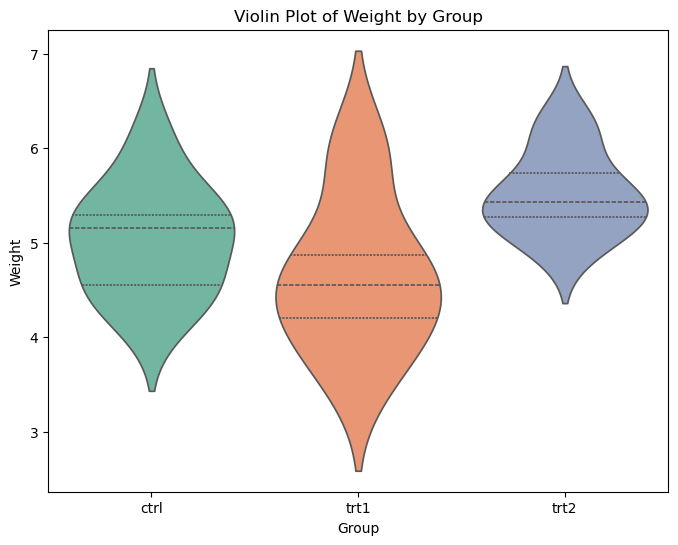

In [10]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='weight', data=df, palette='Set2', inner="quartile")
plt.title("Violin Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

Strip plot

A strip plot is a type of scatter plot used to display the distribution of a single categorical variable. It is particularly useful when you want to show all observations along with some representation of the underlying distribution

C:\Users\keith\AppData\Local\Temp\ipykernel_15048\4075154964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='group', y='weight', data=df, palette='husl')


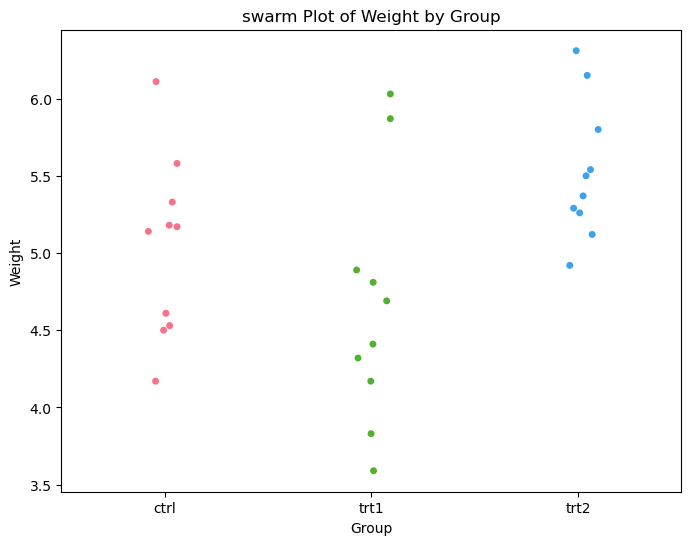

In [11]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='group', y='weight', data=df, palette='husl')
plt.title("swarm Plot of Weight by Group")
plt.xlabel("Group")
plt.ylabel("Weight")
plt.show()

Point plot 

A point plot is a type of plot that uses scatter plot glyphs to visualize features like point estimates and confidence intervals. A point plot uses scatter plot points to represent the central tendency of numeric data.These plots make use of error bars to indicate any uncertainty around the numeric variables.

<Axes: xlabel='group', ylabel='weight'>

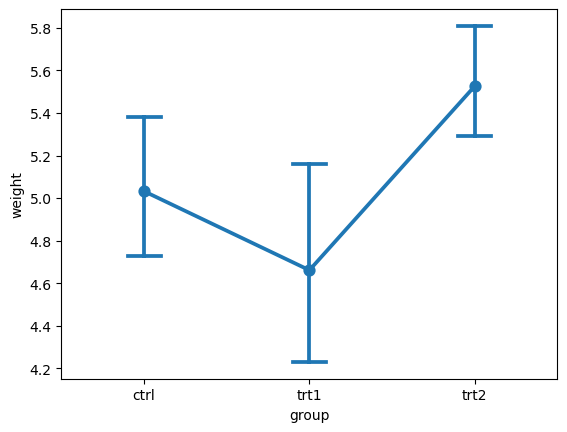

In [12]:
sns.pointplot(data=df, x="group", y="weight", capsize=.2)


Line plot 

Line plots are a fundamental way to visualize data, showing the relationship between two variables by connecting data points with a line.

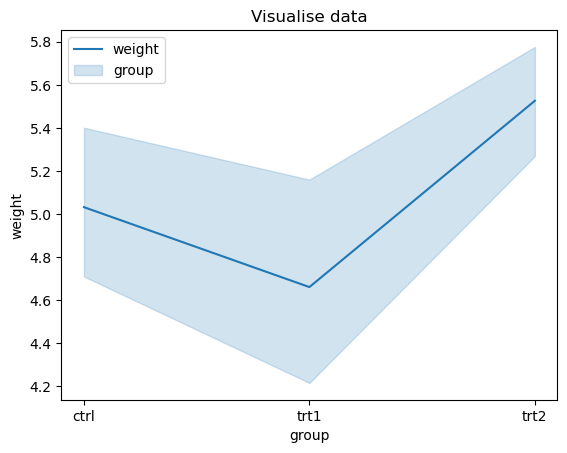

In [13]:
sns.lineplot(data=df, x = 'group', y = 'weight')
#abc
plt.title('Visualise data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

In [14]:
ctrl_weight = df[df['group'] == 'ctrl']['weight']
trt1_weight = df[df['group'] == 'trt1']['weight']
trt2_weight = df[df['group'] == 'trt2']['weight']

-----------------------------------------------------------------------------

# Part Two : Testing distubution 

# The Shapiro wilk test 

The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution. It was introduced by Samuel Shapiro and Martin Wilk in 1965 and has since become a standard method for normality testing due to its effectiveness and reliability.

In [15]:
# Perform Shapiro-Wilk test for normality on each group
print("Shapiro-Wilk Test for Normality:")

# Control group
stat, p_value = shapiro(ctrl_weight)
print(f"Control Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Control group follows a normal distribution.\n")
else:
    print("Control group does not follow a normal distribution.\n")

# Treatment 1 group
stat, p_value = shapiro(trt1_weight)
print(f"Treatment 1 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 1 group follows a normal distribution.\n")
else:
    print("Treatment 1 group does not follow a normal distribution.\n")

# Treatment 2 group
stat, p_value = shapiro(trt2_weight)
print(f"Treatment 2 Group: Shapiro-Wilk Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Treatment 2 group follows a normal distribution.\n")
else:
    print("Treatment 2 group does not follow a normal distribution.\n")

Shapiro-Wilk Test for Normality:
Control Group: Shapiro-Wilk Statistic = 0.9567, p-value = 0.7475
Control group follows a normal distribution.

Treatment 1 Group: Shapiro-Wilk Statistic = 0.9304, p-value = 0.4519
Treatment 1 group follows a normal distribution.

Treatment 2 Group: Shapiro-Wilk Statistic = 0.9410, p-value = 0.5643
Treatment 2 group follows a normal distribution.



# The Anderson-Darling test 

The Anderson–Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. The test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free. The test is named after Theodore Wilbur Anderson and Donald A. Darling, 

In [16]:
result_ctrl = stats.anderson(ctrl_weight, dist="norm")
print("Anderson-Darling Test for Control Group:")
print(f"AD Statistic: {result_ctrl.statistic:.4f}")
for i, critical_value in enumerate(result_ctrl.critical_values):
    significance_level = result_ctrl.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_ctrl.statistic > result_ctrl.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

# Anderson-Darling Test for Treatment 1 Group
result_trt1 = stats.anderson(trt1_weight, dist='norm')
print("Anderson-Darling Test for Treatment 1 Group:")
print(f"AD Statistic: {result_trt1.statistic:.4f}")
for i, critical_value in enumerate(result_trt1.critical_values):
    significance_level = result_trt1.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_trt1.statistic > result_trt1.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

# Anderson-Darling Test for Treatment 2 Group
result_trt2 = stats.anderson(trt2_weight, dist='norm')
print("Anderson-Darling Test for Treatment 2 Group:")
print(f"AD Statistic: {result_trt2.statistic:.4f}")
for i, critical_value in enumerate(result_trt2.critical_values):
    significance_level = result_trt2.significance_level[i]
    print(f"  Critical Value ({significance_level}%): {critical_value:.4f}")
if result_trt2.statistic > result_trt2.critical_values[2]:  # Typically 5% level
    print("Result: The data does NOT follow a normal distribution.\n")
else:
    print("Result: The data likely follows a normal distribution.\n")

Anderson-Darling Test for Control Group:
AD Statistic: 0.2829
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.

Anderson-Darling Test for Treatment 1 Group:
AD Statistic: 0.3298
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.

Anderson-Darling Test for Treatment 2 Group:
AD Statistic: 0.3089
  Critical Value (15.0%): 0.5010
  Critical Value (10.0%): 0.5700
  Critical Value (5.0%): 0.6840
  Critical Value (2.5%): 0.7980
  Critical Value (1.0%): 0.9500
Result: The data likely follows a normal distribution.



# The KS test 

The Kolmogorov-Smirnov (KS) test is a non-parametric test used to determine if a sample comes from a specific distribution or if two samples come from the same distribution. It is particularly useful for comparing continuous distributions.



In [17]:
# Perform KS tests between each pair of groups
print("Kolmogorov-Smirnov Test Results:")
stat, p_value = ks_2samp(ctrl_weight, trt1_weight)
print(f"Control vs Treatment 1: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
     print("No significant difference in distribution between Control and Treatment 1.\n")
else:
    print("Significant difference in distribution between Control and Treatment 1.\n")

# Control vs Treatment 2
stat, p_value = ks_2samp(ctrl_weight, trt2_weight)
print(f"Control vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Control and Treatment 2.\n")
else:
    print("Significant difference in distribution between Control and Treatment 2.\n")

# Treatment 1 vs Treatment 2
stat, p_value = ks_2samp(trt1_weight, trt2_weight)
print(f"Treatment 1 vs Treatment 2: KS Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("No significant difference in distribution between Treatment 1 and Treatment 2.\n")
else:
    print("Significant difference in distribution between Treatment 1 and Treatment 2.\n")

Kolmogorov-Smirnov Test Results:
Control vs Treatment 1: KS Statistic = 0.4000, p-value = 0.4175
No significant difference in distribution between Control and Treatment 1.

Control vs Treatment 2: KS Statistic = 0.5000, p-value = 0.1678
No significant difference in distribution between Control and Treatment 2.

Treatment 1 vs Treatment 2: KS Statistic = 0.8000, p-value = 0.0021
Significant difference in distribution between Treatment 1 and Treatment 2.



# Plotting for normality

Running the above tests have shown there is a normal distribution on our dataset. To wrap up this section I am going to create some plots to help show this. 

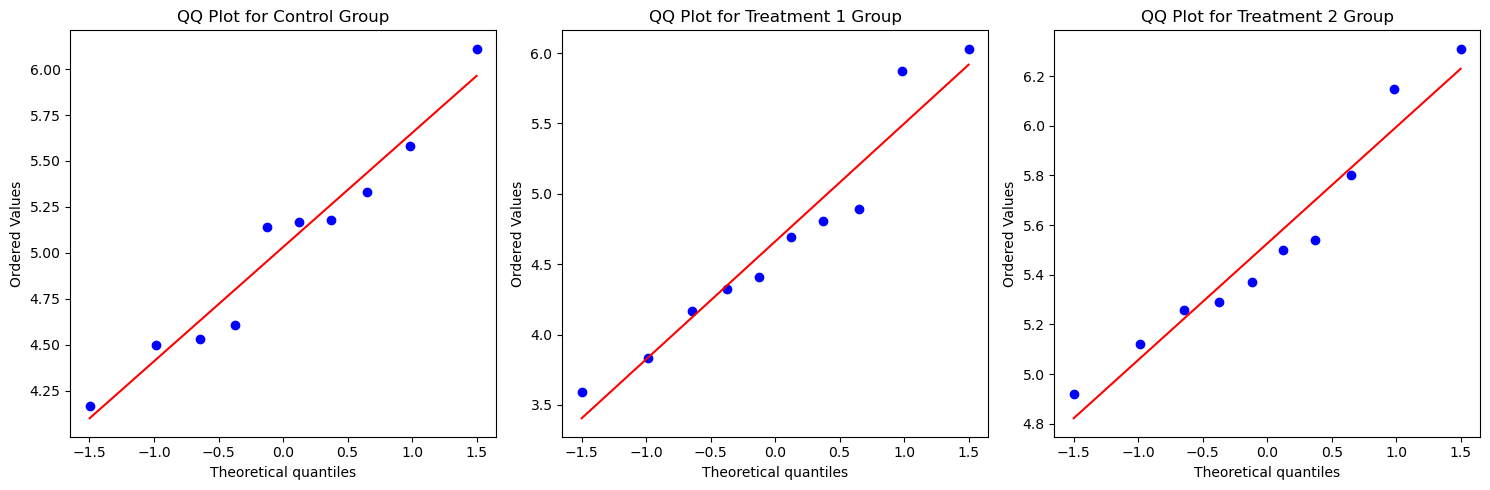

In [18]:
plt.figure(figsize=(15, 5))

# QQ plot for Control group
plt.subplot(1, 3, 1)
stats.probplot(df[df['group'] == 'ctrl']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Control Group")

# QQ plot for Treatment 1 group
plt.subplot(1, 3, 2)
stats.probplot(df[df['group'] == 'trt1']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Treatment 1 Group")

# QQ plot for Treatment 2 group
plt.subplot(1, 3, 3)
stats.probplot(df[df['group'] == 'trt2']['weight'], dist="norm", plot=plt)
plt.title("QQ Plot for Treatment 2 Group")

plt.tight_layout()
plt.show()

1. For the Control group, the QQ plot revealed slight deviations from the diagonal line on the upper tail, indicating minor right skewness in the distribution.
2. For Treatment 1, the QQ plot showed more noticeable deviations at the upper tail, confirming that this group is moderately right-skewed.
3. For Treatment 2, the QQ plot had deviations primarily at the upper end but remained close to the diagonal overall, indicating the distribution was less skewed compared to Treatment 1.

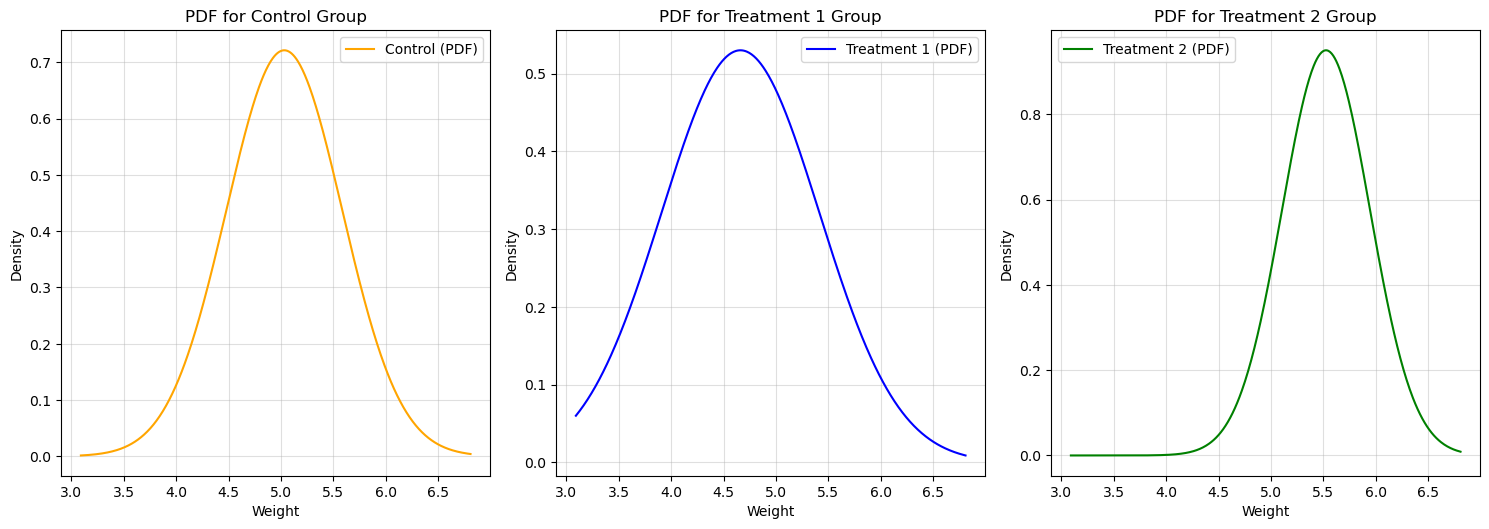

In [19]:
# Calculate PDFs for Control, Treatment 1, and Treatment 2 groups assuming normal distributions

# Define range for PDF calculation
x_range = np.linspace(
    min(np.min(ctrl_weight), np.min(trt1_weight), np.min(trt2_weight)) - 0.5,
    max(np.max(ctrl_weight), np.max(trt1_weight), np.max(trt2_weight)) + 0.5,
    500
)

# Compute PDFs for each group
mean_ctrl, std_ctrl = np.mean(ctrl_weight), np.std(ctrl_weight, ddof=0)
pdf_ctrl = (1 / (std_ctrl * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_ctrl) / std_ctrl) ** 2)

mean_trt1, std_trt1 = np.mean(trt1_weight), np.std(trt1_weight, ddof=0)
pdf_trt1 = (1 / (std_trt1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_trt1) / std_trt1) ** 2)

mean_trt2, std_trt2 = np.mean(trt2_weight), np.std(trt2_weight, ddof=0)
pdf_trt2 = (1 / (std_trt2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_range - mean_trt2) / std_trt2) ** 2)

# Plot the PDFs
plt.figure(figsize=(15, 10))

# PDF plot for Control group
plt.subplot(2, 3, 1)
plt.plot(x_range, pdf_ctrl, label='Control (PDF)', color='orange')
plt.title("PDF for Control Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

# PDF plot for Treatment 1 group
plt.subplot(2, 3, 2)
plt.plot(x_range, pdf_trt1, label='Treatment 1 (PDF)', color='blue')
plt.title("PDF for Treatment 1 Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

# PDF plot for Treatment 2 group
plt.subplot(2, 3, 3)
plt.plot(x_range, pdf_trt2, label='Treatment 2 (PDF)', color='green')
plt.title("PDF for Treatment 2 Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.grid(alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


1. For the Control group, the PDF showed a distribution that was slightly right-skewed, with a concentration of values around 6.15 to 6.35.
2. For Treatment 1, the PDF also appeared right-skewed, with values clustering around 6.30 to 6.45.
3. For Treatment 2, the PDF had a higher peak, indicating more concentration around larger values (6.55 to 6.70). This suggests Treatment 2 has consistently higher weights compared to the other groups.

# What does the PDF and QQ plot show 
1. The PDF plot highlight that Treatment 2 has higher weights overall, with a more concentrated distribution, while Control and Treatment 1 have a wider spread.
2. The QQ plots confirm deviations from normality, especially in the Control and Treatment 1 groups, due to slight right-skewness.
3. These visualisations help validate that assumptions of normality may not hold perfectly for the Control and Treatment 1 groups, which can influence parametric tests like t-tests and ANOVA.

# Testing the median

I quickly want to explore other tests like the Median Absolute Deviation (MAD) and Mood's Median Test are particularly useful when the assumptions of parametric tests, such as normality or equal variances, are not satisfied. Running these tests ensures a more robust analysis and provides alternative insights when parametric assumptions are in question. I also want to test for skewness

# Moods median test

Mood's Median Test is a non-parametric test used to determine if two or more independent samples come from populations with the same median. It is particularly useful when the assumption of normality is violated, as it focuses on the central tendency (median) rather than the mean.

In [20]:


# Mood's Median test across all three groups
stat, p_value, _, _ = median_test(ctrl_weight, trt1_weight, trt2_weight)
print(f"Mood's Median Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in medians among the groups.")
else:
    print("No significant difference in medians among the groups.")

Mood's Median Test Statistic = 7.2000, p-value = 0.0273
There is a significant difference in medians among the groups.


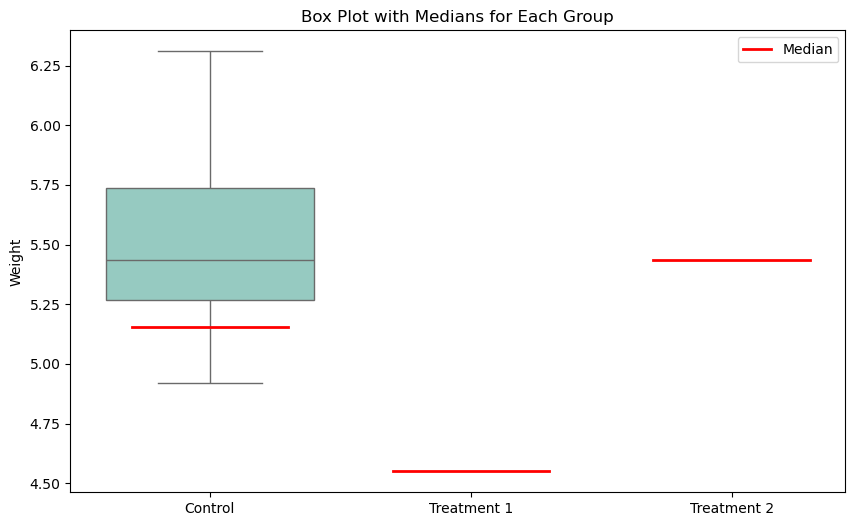

In [21]:


# Combining data and labels for plotting
data = [ctrl_weight, trt1_weight, trt2_weight]
labels = ['Control', 'Treatment 1', 'Treatment 2']

# Plot boxplot with median emphasis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set3")
plt.xticks([0, 1, 2], labels)
plt.title("Box Plot with Medians for Each Group")
plt.ylabel("Weight")

# Adding median lines
for i, group in enumerate(data):
    plt.plot([i - 0.3, i + 0.3], [np.median(group)] * 2, color="red", linewidth=2, label="Median" if i == 0 else "")

plt.legend()
plt.show()


# Median Absolute Deviation (MAD):
MAD is a robust measure of variability that calculates the median of the absolute deviations from the median. Unlike the standard deviation, MAD is less sensitive to outliers and skewed data, making it ideal for non-normal distributions.

The Interquartile Range is similar to the MAD, and is a simpler statistic. However, it’s less robust.

The MAD is defined as:

MAD = median(|Yi – median(Yi|)

In [22]:


# Calculating MAD for each group
mad_control = robust.mad(ctrl_weight)
mad_trt1 = robust.mad(trt1_weight)
mad_trt2 = robust.mad(trt2_weight)

print(f"Median Absolute Deviation (MAD):")
print(f"Control: {mad_control:.4f}")
print(f"Treatment 1: {mad_trt1:.4f}")
print(f"Treatment 2: {mad_trt2:.4f}")


Median Absolute Deviation (MAD):
Control: 0.7191
Treatment 1: 0.5337
Treatment 2: 0.3632


# Skewness and Kurtosis

In statistics, skewness and kurtosis are two ways to measure the shape of a distribution.

Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.

1. Negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
2. Positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
3. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical. 

Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.


In [23]:
# Calculate skewness and kurtosis
skew_ctrl = stats.skew(ctrl_weight)
kurt_ctrl = stats.kurtosis(ctrl_weight)

skew_trt1 = stats.skew(trt1_weight)
kurt_trt1 = stats.kurtosis(trt1_weight)

skew_trt2 = stats.skew(trt2_weight)
kurt_trt2 = stats.kurtosis(trt2_weight)

print("Skewness and Kurtosis:")
print(f"Control - Skewness: {skew_ctrl:.4f}, Kurtosis: {kurt_ctrl:.4f}")
print(f"Treatment 1 - Skewness: {skew_trt1:.4f}, Kurtosis: {kurt_trt1:.4f}")
print(f"Treatment 2 - Skewness: {skew_trt2:.4f}, Kurtosis: {kurt_trt2:.4f}")


Skewness and Kurtosis:
Control - Skewness: 0.2707, Kurtosis: -0.6751
Treatment 1 - Skewness: 0.5557, Kurtosis: -0.6602
Treatment 2 - Skewness: 0.5677, Kurtosis: -0.7288


---------------------------------------------------------------------------------

# Part Three T tests and ANOVA



# T tests 

In this project one of the areas we will be looking at is T tests. A T test is a method used to find the difference in the means between two groups and how these groups are related. For example, if we wanted to look at the number of smoker and non smokers in a givng group we could use a t test to compare these. The outcome of these tests is known as the T value.

T-Test, also known as the Student’s t-test, is a method of testing hypotheses about the mean of a small sample drawn from a normally distributed population when the population standard deviation is unknown. T-Tests are used to compare sample populations and infer conclusions about the larger population. For tests involving the mean of a sample of size greater than 30 the normal distribution is usually applied.

The T-Test was first introduced in 1908 by William Sealy Gosset, an employee at the Guinness brewery, under the pseudonym "Student." Gosset developed the t-test to address the limitations of existing statistical techniques, which were designed for large samples and proved ineffective for the small sample sizes he encountered in his work.




# Assumptions for T test 

1. The scale of measurements applied to a T test follows a continuous or ordinal scale. These follow numeric values, and the scale can be divided meaningfully into smaller increments, such as fractional and decimal values. For example, weight, height, and temperature are continuous. In our dataset we can see that the weight variable in the dataset is confirmed as a continuous variable.

2. Sample size: The second assumption is that the sample size for both groups are of considerable size. A Student's t-test is appropriate to use when the sample size is around 30,Sample size is important because the data has to be normally distributed, which is difficult to achieve with a small sample size. Another concern is that poor data representation by small sample sizes tend to produce less precise estimates. The standard error is also increased, which makes it harder to detect a true difference between groups (Type I and II errors), eventually leading to a reduced power of test. Standard error decreases as sample size increases. 

3. The data, when plotted, results in a normal distribution, bell-shaped distribution curve. This is a crucial assumption because if the samples are not normally distributed then it isn’t valid to use the p-values from the test to draw conclusions about the differences between the samples. If the sample sizes are small (n < 50), then we can use a Shapiro-Wilk test to determine if each sample size is normally distributed. If the p-value of the test is less than a certain significance level, then the data is likely not normally distributed. if greater than this we can use a qq plot. 

4. The data is collected from a representative, randomly selected portion of the total population.

5. Homogeneity of variance is important because the standard error in the denominator of the t-statistic formula relies on an assumption of equal variances. In pooled variance, when sample sizes are equal, each group contributes equally to the pooled variance, preventing one group's variance from disproportionately affecting the estimate. The group with the larger sample size will create imbalance by dominating the pooled variance estimate. you can use Levenes test which was developed by and named after American statistician and geneticist Howard Levene to test for this. 

In [24]:

# Levene's test for equal variances
stat, p_value = levene(ctrl_weight, trt1_weight, trt2_weight)
print("Levene's Test for Homogeneity of Variances:")
print(f"Statistic = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in variances among groups (p < 0.05). Variances are not equal.")
else:
    print("No significant difference in variances among groups (p >= 0.05). Variances are likely equal.")


Levene's Test for Homogeneity of Variances:
Statistic = 1.1192, p-value = 0.3412
No significant difference in variances among groups (p >= 0.05). Variances are likely equal.


In [25]:


# Example: Independent t-test between Control and Treatment 1
stat, p_value = ttest_ind(trt1_weight, trt2_weight, equal_var=True)
print(f"t-test Statistic = {stat:.4f}, p-value = {p_value:.4f}")  

if p_value > 0.05:
    print('Accept the null hypothesis: There is no significant difference between the means.')
else:
    print('Reject the null hypothesis: There is a significant difference between the means.')

t-test Statistic = -3.0101, p-value = 0.0075
Reject the null hypothesis: There is a significant difference between the means.


The t-statistic of -3.01 indicates that the mean of trt1 is significantly lower (hence the negative value) than the mean of trt2.
The P-value of 0.0075 is much lower than the commonly used threshold for statistical significance (0.05), thus rejecting of the null hypothesis that there is no difference between the group means.

# Cohen's d test 



Cohen's d quantifies the magnitude of the difference between two group means relative to the pooled standard deviation. Unlike p-values, which only tell us about statistical significance, Cohen's d provides insight into the practical significance of the observed difference.

### Formula for Cohen's d
$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s_{\text{pooled}}}
$$






In [26]:
# Calculate Cohen's d to measure the effect size

# Means and standard deviations of the two groups
mean_trt1 = np.mean(trt1_weight)
mean_trt2 = np.mean(trt2_weight)
std_trt1 = np.std(trt1_weight, ddof=1)  # Sample standard deviation
std_trt2 = np.std(trt2_weight, ddof=1)

# Pooled standard deviation
n_trt1 = len(trt1_weight)
n_trt2 = len(trt2_weight)
pooled_std = np.sqrt(((n_trt1 - 1) * std_trt1**2 + (n_trt2 - 1) * std_trt2**2) / (n_trt1 + n_trt2 - 2))

# Cohen's d
cohens_d = (mean_trt1 - mean_trt2) / pooled_std
cohens_d

-1.3461569918326173

# ANOVA

ANOVA was introduced by RA Fisher in the early 20th century and is concerned with investigating differences in means. There are different types of ANOVA these are as follows 
1. One-way ANOVA: for one independent variable
2. Two-way ANOVA: for two independent variables 
3. N-way ANOVA: for multiple factors 

The output of an ANOVA test is the F-statistic, P-value and DF or degree of freedom. In the above sections we looked at T tests and we carried out the t test on two groups when there are only two groups involved, the t-test and F-test are similar, but when there is more than two groups this where ANOVA takeovers as it is more efficient, and prevents confusion and mistakes because all the means are compared simultaneously instead of analysing different pair combinations from multiple groups.  

the formula for ANOVA is 

$$
F = \frac{\text{MSB}}{\text{MSE}}
$$
 




# Tukey's HSD 

This was created by the John Tukey and it is used for multiple comparisons to check if there is a significant difference between the means after an ANOVA test has been performed. Tukey's reasoning for creating this test at the time was due to the fact that t tests were been used on three or more groups he did not think that this was an honest approach hence the name honest significant difference.  

The Formula for this is 

$$
HSD = q \cdot \sqrt{\frac{MSE}{n}}
$$






q: The critical value from the Studentized range distribution, depending on the number of groups and degrees of freedom.

MSE: The mean squared error from the ANOVA table.

n: The sample size for each group (assumes equal sample sizes in classic Tukey's HSD).

ANOVA Results:
       Statistic  p-Value
ANOVA   4.846088  0.01591

Tukey's HSD Post Hoc Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
    Control Treatment 1   -0.371 0.3909 -1.0622 0.3202  False
    Control Treatment 2    0.494  0.198 -0.1972 1.1852  False
Treatment 1 Treatment 2    0.865  0.012  0.1738 1.5562   True
-------------------------------------------------------------


<Figure size 1200x600 with 0 Axes>

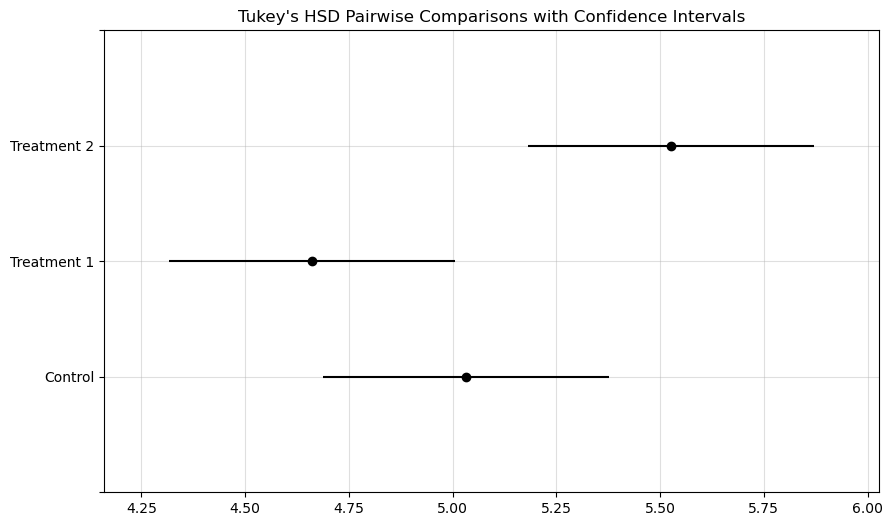

In [27]:
# Perform ANOVA directly using trt1_weight, trt2_weight, and ctrl_weight as variables
anova_stat, anova_p_value = f_oneway(ctrl_weight, trt1_weight, trt2_weight)

# Perform Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(
    np.concatenate([ctrl_weight, trt1_weight, trt2_weight]),
    ['Control'] * len(ctrl_weight) + ['Treatment 1'] * len(trt1_weight) + ['Treatment 2'] * len(trt2_weight),
    alpha=0.05
)

# Display ANOVA results
anova_results = {
    "Statistic": [anova_stat],
    "p-Value": [anova_p_value]
}
anova_results_df = pd.DataFrame(anova_results, index=["ANOVA"])

# Output results and Tukey HSD test summary
print("ANOVA Results:")
print(anova_results_df)

print("\nTukey's HSD Post Hoc Results:")
print(tukey_results.summary())

# Visualization of Tukey HSD results
plt.figure(figsize=(12, 6))
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Pairwise Comparisons with Confidence Intervals")
plt.grid(alpha=0.4)
plt.show()




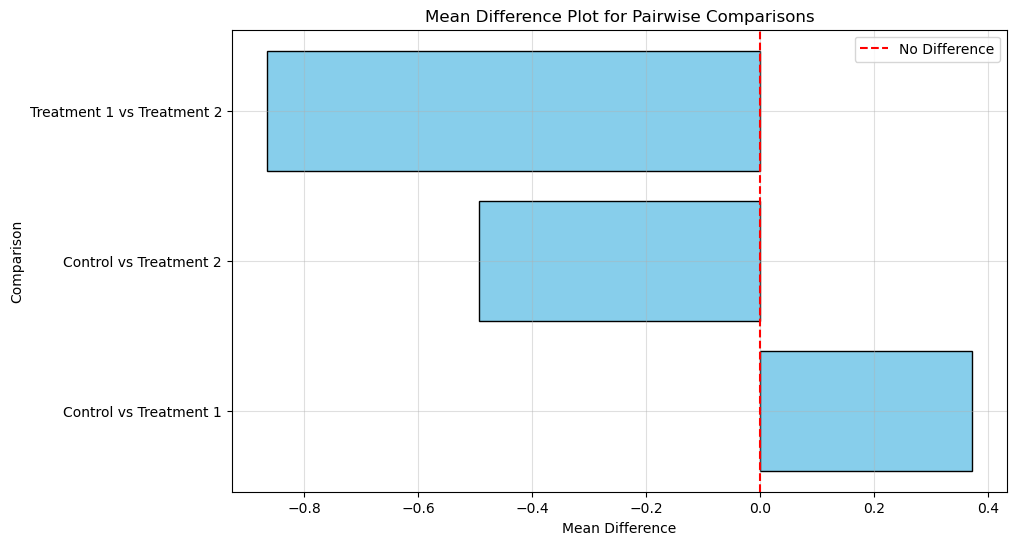

In [28]:
mean_diff_results = {
    "Comparison": ["Control vs Treatment 1", "Control vs Treatment 2", "Treatment 1 vs Treatment 2"],
    "Mean Difference": [
        np.mean(ctrl_weight) - np.mean(trt1_weight),
        np.mean(ctrl_weight) - np.mean(trt2_weight),
        np.mean(trt1_weight) - np.mean(trt2_weight)
    ]
}

# Convert to a DataFrame for easier visualization
mean_diff_df = pd.DataFrame(mean_diff_results)

# Create a mean difference plot
plt.figure(figsize=(10, 6))
plt.barh(mean_diff_df["Comparison"], mean_diff_df["Mean Difference"], color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='No Difference')
plt.title("Mean Difference Plot for Pairwise Comparisons")
plt.xlabel("Mean Difference")
plt.ylabel("Comparison")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

ANOVA shows an F-Statistic: 29.01 p-Value:  0.000007.  This very small p-value indicates that there are significant differences among the means of at least one pair of groups. It also means we can  we reject the null hypothesis and conclude that not all group means are equal. The HSD test shows that only treatment 1 vs treatment 2 shows a significant difference. 

# Why use ANOVA over multiple T Tests

In terms of ANOVA vs several t-tests when analysing more than three groups, the main advantage to using ANOVA is efficiency. It requires fewer statistical tests to reach a conclusion about group differences, which saves time and resources.

In a real-world scenario, performing multiple t-tests would be expensive and time-consuming, while performing a One-way ANOVA would make obtaining statistical inferences more efficient.

Another benefit around using ANOVA over multiple t-tests is around the issue of error, and protecting the type I error rate that can occur. A typoical p-value is below 0.05 which represents a 5% risk of making an error when making claims about statistical significance. Using multiple t-tests and making multiple comparisons is essentially compounding this error risk with each added test, so the total experiment-wide error rate is now much higher than 5%. This is what would happen with multiple t-tests. 

Another point to note here is Running multiple t-tests is not only computationally expensive but also time-consuming, especially when there are many groups to compare ANOVA Requires fewer computations. It also allows you to draw conclusions in a single step, making it ideal for larger datasets or real-world studies. And ANOVA is more robust to minor violations of these assumptions when sample sizes are equal or large.

--------------------------------------------------------------------------------------

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df = pd.DataFrame({
    'Treatment': ['Control'] * 10 + ['Treatment 1'] * 10 + ['Treatment 2'] * 10,
    'Weight': np.random.rand(30) * 10  # Replace with actual dataset
})

# Convert categorical Treatment variable to numerical
df['Treatment_Code'] = df['Treatment'].astype('category').cat.codes


In [32]:
X = df[['Treatment_Code']]
y = df['Weight']

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Mean Squared Error: 5.8523
R² Score: 0.0898


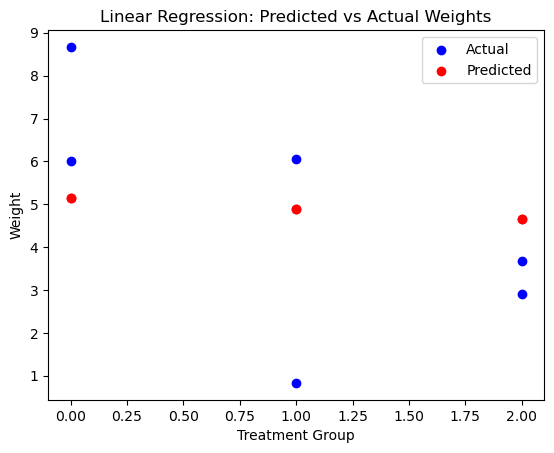

In [37]:
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.title("Linear Regression: Predicted vs Actual Weights")
plt.legend()
plt.show()

 # K-Means Clustering to Find Patterns

In [38]:
from sklearn.cluster import KMeans

In [39]:
X = df[['Weight']]

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

c:\Users\keith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


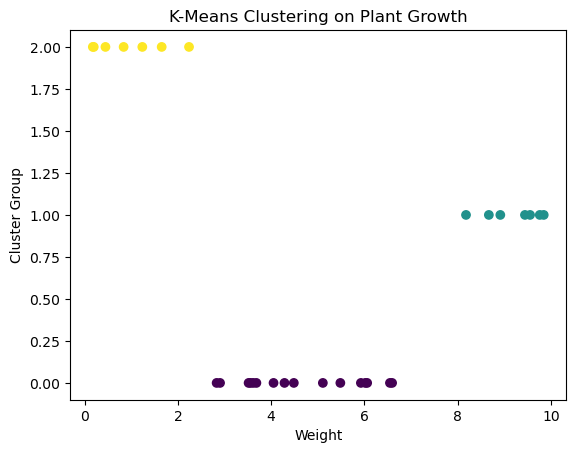

In [41]:
plt.scatter(df['Weight'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Weight")
plt.ylabel("Cluster Group")
plt.title("K-Means Clustering on Plant Growth")
plt.show()



# References

(No date a) What is discrete data vs. continuous data? uses and examples | indeed.com. Available at: [https://www.indeed.com/career-advice/career-development/what-is-discrete-data](https://www.indeed.com/career-advice/career-development/what-is-discrete-data).

(No date b) Medium. Available at: [https://towardsdatascience.com/median-absolute-deviation-made-easy-50c158bc0d3d](https://towardsdatascience.com/median-absolute-deviation-made-easy-50c158bc0d3d).

(No date c) Lesson 27: The Central Limit Theorem. Available at: [https://online.stat.psu.edu/stat414/book/export/html/750](https://online.stat.psu.edu/stat414/book/export/html/750).

(No date d) Khan Academy. Available at: [https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library).

2.1.24.7.1 ocmath_anderson_darling_test (no date) OriginLab Corporation - Data Analysis and Graphing Software. Available at: [https://www.originlab.com/doc/OriginC/ref/ocmath_anderson_darling_test](https://www.originlab.com/doc/OriginC/ref/ocmath_anderson_darling_test).

7. the T tests: The BMJ (2020) The BMJ | The BMJ: leading general medical journal. Available at: [https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests).

Alexander (2019) Median absolute deviation, Statistics How To. Available at: [https://www.statisticshowto.com/median-absolute-deviation/](https://www.statisticshowto.com/median-absolute-deviation/).

Alexander (2020) Mood’s median test: Definition, run the test and interpret results, Statistics How To. Available at: [https://www.statisticshowto.com/moods-median-test/](https://www.statisticshowto.com/moods-median-test/).

Analysis of variance (2024) Wikipedia. Available at: [https://en.wikipedia.org/wiki/Analysis_of_variance](https://en.wikipedia.org/wiki/Analysis_of_variance).

AuthorityJ (2024) Understanding the Shapiro-Wilk test: A key tool for testing normality, Medium. Available at: [https://medium.com/@austinej86/understanding-the-shapiro-wilk-test-a-key-tool-for-testing-normality-14ae5107b6b5](https://medium.com/@austinej86/understanding-the-shapiro-wilk-test-a-key-tool-for-testing-normality-14ae5107b6b5).

Beck, K. (2022) What is the Tukey HSD test?, Sciencing. Available at: [https://www.sciencing.com/what-is-the-tukey-hsd-test-12751748/](https://www.sciencing.com/what-is-the-tukey-hsd-test-12751748/).

Bhandari, P. (2023) What is effect size and why does it matter? (examples), Scribbr. Available at: [https://www.scribbr.com/statistics/effect-size/](https://www.scribbr.com/statistics/effect-size/).

Brownlee, J. (2019) How to code the student’s T-test from scratch in Python, MachineLearningMastery.com. Available at: [https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/).

Brownlee, J. (2020) A gentle introduction to probability density estimation, MachineLearningMastery.com. Available at: [https://machinelearningmastery.com/probability-density-estimation/](https://machinelearningmastery.com/probability-density-estimation/).

Brownlee, J. (2021) 17 statistical hypothesis tests in Python (cheat sheet), MachineLearningMastery.com. Available at: [https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/).

Cohen’s D: Definition, examples, formulas (2024) Statistics How To. Available at: [https://www.statisticshowto.com/cohens-d/](https://www.statisticshowto.com/cohens-d/).

Comment, info, M., K et al. (2024) Central limit theorem in statistics: Formula, derivation, examples & proof, GeeksforGeeks. Available at: [https://www.geeksforgeeks.org/central-limit-theorem/](https://www.geeksforgeeks.org/central-limit-theorem/).

Comment, info, M., P et al. (2024) T-test, GeeksforGeeks. Available at: [https://www.geeksforgeeks.org/t-test/](https://www.geeksforgeeks.org/t-test/).

Data types and formats (2023) Data Analysis and Visualization in Python for Ecologists: Data Types and Formats. Available at: [https://datacarpentry.github.io/python-ecology-lesson/04-data-types-and-format.html](https://datacarpentry.github.io/python-ecology-lesson/04-data-types-and-format.html).

Degrees of freedom: Definition, examples (2024) Statistics How To. Available at: [https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/).

Frost, J. (2022) Degrees of freedom in statistics, Statistics By Jim. Available at: [https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/).

Frost, J. (2023b) Using post hoc tests with ANOVA, Statistics By Jim. Available at: [https://statisticsbyjim.com/anova/post-hoc-tests-anova/](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

GeeksforGeeks (2023) Levene’s Test, GeeksforGeeks. Available at: [https://www.geeksforgeeks.org/levenes-test/](https://www.geeksforgeeks.org/levenes-test/).

GeeksforGeeks (2024a) ANOVA formula in statistics with solved examples and faqs, GeeksforGeeks. Available at: [https://www.geeksforgeeks.org/anova-formula/](https://www.geeksforgeeks.org/anova-formula/).

Gurchetan (2024) What is analysis of variance (ANOVA)?, Analytics Vidhya. Available at: [https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/](https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/).

Levene’s Test (2024) Wikipedia. Available at: [https://en.wikipedia.org/wiki/Levene%27s_test](https://en.wikipedia.org/wiki/Levene%27s_test).

Tukey test / tukey procedure / honest significant difference (2024) Statistics How To. Available at: [https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/post-hoc/tukey-test-honest-significant-difference/).
 

-------------------------------------------------------

# end of notebook 